<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/Complete%20ML%2060H%20Siddhardhan/001_Complete_Machine_Learning_Course_in_60_Hours_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# where we collect the Data?

# -> Kaggle
# -> UCI Machine Learning Repository
# -> Google Dataset Search

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Handling Missing Values

- df.dropna(inplace=True) > Remove rows with missing values

- df['column_name'].fillna(0, inplace=True)  # Example: fill with 0 > Fill with a constant value

- df['column_name'].fillna(df['column_name'].mean(), inplace=True) > Fill with the mean

- df['column_name'].fillna(df['column_name'].median(), inplace=True) > Fill with the median

- df['column_name'].fillna(df['column_name'].mode()[0], inplace=True) > Fill with the mode

- df.fillna(method='ffill', inplace=True)
- df.fillna(method='bfill', inplace=True)


In [ ]:
# Seed for reproducibility
np.random.seed(42)

# Creating a DataFrame with 6 features and 20 rows
data = {
    'Feature1': np.random.randint(1, 100, 40),
    'Feature2': np.random.randint(1, 100, 40),
    'Feature3': np.random.randint(1, 100, 40),
    'Feature4': np.random.randint(1, 100, 40),
    'Feature5': np.random.randint(1, 100, 40),
    'Result': np.random.randint(50, 100, 40)
}

df = pd.DataFrame(data)

# Introducing missing values in the 'Result' column
nan_indices = np.random.choice(df.index, size=8, replace=False)
df.loc[nan_indices, 'Result'] = np.nan

# Adding 3 outliers to the 'Result' column
outlier_indices = np.random.choice(df.index.difference(nan_indices), size=2, replace=False)
df.loc[outlier_indices, 'Result'] = [140,150]

In [ ]:
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Result
0,52,51,44,5,4,86.0
1,93,55,34,41,94,82.0
2,15,64,74,28,23,91.0
3,72,3,62,7,15,93.0
4,61,51,14,73,43,73.0
5,21,7,95,72,29,64.0
6,83,21,48,12,36,140.0
7,87,73,15,34,13,81.0
8,75,39,72,33,32,73.0
9,75,18,78,48,71,90.0


In [ ]:
df.shape

(40, 6)

In [ ]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Result      8
dtype: int64

<ipython-input-16-8b3cb060f6fd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Result)


<Axes: xlabel='Result', ylabel='Density'>

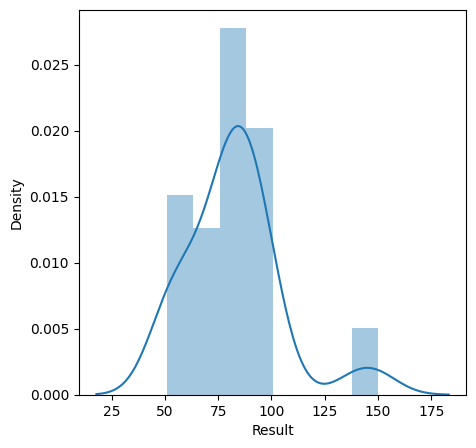

In [ ]:
# Central Tendencies ># Mean # Median # Mode

# analyse the distribution of data (salery)

fig ,ax = plt.subplots(figsize=(5,5))

sns.distplot(df.Result)


Mean: Outliers can pull the mean towards their extreme values. If there are outliers with large values, the mean can be inflated, while outliers with small values can lower the mean.

In [ ]:
# Filling missing values in the 'Result' column with the median of the column
df['Result'].fillna(df['Result'].median(), inplace=True)

## Theory: Effect of Outliers on the Mean

The mean is the average value of a dataset and is sensitive to outliers.

Outliers are extreme values that differ significantly from other observations.

When outliers are present, they can skew the mean, making it higher or lower than the central tendency of the majority of the data.

This is because the mean takes into account the magnitude of all values, including the outliers.

Therefore, in datasets with significant outliers, the mean may not accurately represent the central tendency.

In [ ]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Result      0
dtype: int64

<ipython-input-19-2096e54fcd9a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Result)


<Axes: xlabel='Result', ylabel='Density'>

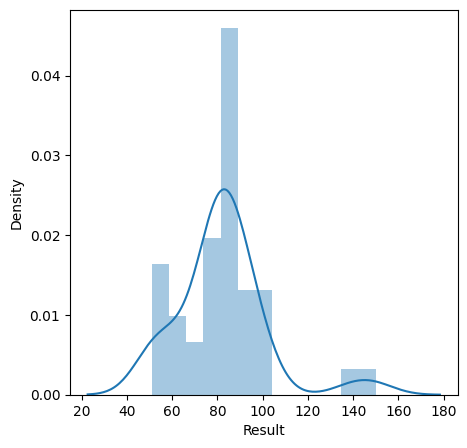

In [ ]:
fig ,ax = plt.subplots(figsize=(5,5))

sns.distplot(df.Result)

## Standardization
Standardization is a data preprocessing technique used to rescale the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This process is crucial in machine learning and statistical analysis because it ensures that each feature contributes equally to the model, regardless of its original scale.

z= (x−μ) / σ
​

 x is the original value.

 μ is the mean of the feature.

 σ is the standard deviation of the feature.

## Normalization
Normalization is a data preprocessing technique used to rescale the features of a dataset to a specific range, typically [0, 1]. This process is essential in machine learning and data analysis to ensure that all features have the same scale, preventing any single feature from disproportionately influencing the model


x′ = x - min(x) / max(x) - min(x)

x is the original value

min(x) is the minimum value of the feature

max(x) is the maximum value of the feature.

x′ is the normalized value

In [ ]:
# Create a dataset using arange and add noise
x = np.arange(1, 41)  # 40 data points
noise1 = np.random.normal(0, 1, x.shape)  # Adding Gaussian noise
noise2 = np.random.normal(0, 5, x.shape)  # Adding more Gaussian noise for larger range

data = {
    'Feature1': x + noise1,  # Small range
    'Feature2': 15*x + noise1 + noise2, # Large range
    'Feature3': 1.2 * x + noise2,  # Small range
    'Result': np.random.randint(50, 100, x.shape[0])
}

df = pd.DataFrame(data)

df

,Feature1,Feature2,Feature3,Result
0,3.569927,24.148759,7.778833,88
1,0.892896,20.127360,-6.365535,89
2,4.388582,50.170340,7.381758,84
3,1.340649,50.275527,-2.265122,83
4,2.921623,79.155097,12.233474,96
5,4.759360,77.909971,-3.649388,73
6,5.822472,95.055125,-0.367347,71
7,8.203702,117.479091,6.875389,54
8,9.289842,140.148956,15.659113,82
9,9.745179,149.590387,11.845209,85


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Separate features and result
features = df[['Feature1', 'Feature2', 'Feature3']]
result = df['Result']


# Standardize the features
features_standardized = standard_scaler.fit_transform(features)

# Normalize the features
features_normalized = minmax_scaler.fit_transform(features)

# Create new DataFrames with the standardized and normalized features
df_standardized = pd.DataFrame(features_standardized, columns=['Feature1', 'Feature2', 'Feature3'])
df_standardized['Result'] = result

df_normalized = pd.DataFrame(features_normalized, columns=['Feature1', 'Feature2', 'Feature3'])
df_normalized['Result'] = result

In [ ]:
df_standardized

,Feature1,Feature2,Feature3,Result
0,-1.439951,-1.634342,-1.114292,88
1,-1.671093,-1.657574,-2.062325,89
2,-1.369267,-1.484014,-1.140906,84
3,-1.632433,-1.483406,-1.787493,83
4,-1.495927,-1.316567,-0.815718,96
5,-1.337253,-1.323760,-1.880274,73
6,-1.245461,-1.224712,-1.660293,71
7,-1.039860,-1.095167,-1.174846,54
8,-0.946080,-0.964202,-0.586113,82
9,-0.906766,-0.909658,-0.841741,85


In [ ]:
df_normalized

,Feature1,Feature2,Feature3,Result
0,0.068868,0.006998,0.236243,88
1,0.000000,0.000000,0.000000,89
2,0.089929,0.052282,0.229611,84
3,0.011519,0.052465,0.068486,83
4,0.052190,0.102722,0.310646,96
5,0.099467,0.100555,0.045366,73
6,0.126816,0.130391,0.100183,71
7,0.188075,0.169414,0.221154,54
8,0.216016,0.208865,0.367862,82
9,0.227730,0.225295,0.304161,85


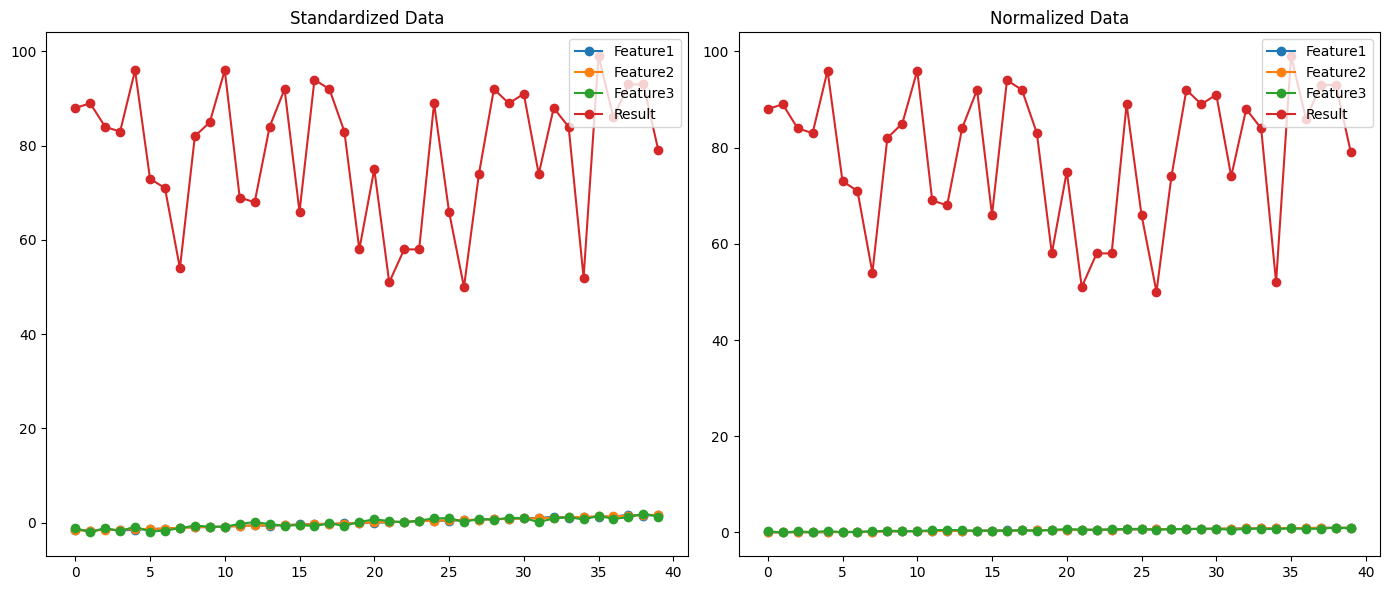

In [ ]:
# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting standardized data
axes[0].plot(df_standardized, marker='o')
axes[0].set_title('Standardized Data')
axes[0].legend(df_standardized.columns, loc='upper right')

# Plotting normalized data
axes[1].plot(df_normalized, marker='o')
axes[1].set_title('Normalized Data')
axes[1].legend(df_normalized.columns, loc='upper right')

plt.tight_layout()
plt.show()

## Label Encoding
Label Encoding is a technique used in machine learning to convert categorical values into numerical values. This is important because many machine learning algorithms require numerical input, and label encoding helps to transform categorical data into a format that these algorithms can process.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {
    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']
}

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])

df

,Color,Color_encoded
0,Red,2
1,Green,1
2,Blue,0
3,Red,2
4,Green,1


In [ ]:
data = {
    'Animal': ['Cat', 'Dog', 'Bird', 'Cat', 'Dog']
}
df = pd.DataFrame(data)

# Define the custom mapping
custom_mapping = {'Cat': 1, 'Dog': 2, 'Bird': 0}

# Apply the custom mapping to the 'Animal' column
df['Animal_encoded'] = df['Animal'].map(custom_mapping)

df

,Animal,Animal_encoded
0,Cat,1
1,Dog,2
2,Bird,0
3,Cat,1
4,Dog,2


## Imbalanced Datasets
An imbalanced dataset occurs when the classes in a dataset are not represented equally. In classification problems, this imbalance can lead to biased models that perform well on the majority class but poorly on the minority class

In [ ]:
# Create the dataset ( demo set )

n_entries = 100
n_majority = 80
n_minority = 20

# Generate features
features = np.random.randn(n_entries, 4)  # 4 features with random values

# Create the target variable
target = np.concatenate([np.zeros(n_majority), np.ones(n_minority)])

# Shuffle the target to mix minority and majority classes
np.random.shuffle(target)

# Create DataFrame
df = pd.DataFrame(features, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df['Result'] = target

df.head(20)

,Feature1,Feature2,Feature3,Feature4,Result
0,-0.261966,-0.507680,0.302399,-0.785353,1.0
1,0.901475,-0.138863,-0.364202,0.752876,1.0
2,-0.319557,0.948177,0.979593,-1.334804,0.0
3,1.109260,-1.462036,1.171581,2.028357,1.0
4,0.874834,-2.156981,1.063566,2.246129,0.0
5,-0.303032,-0.034703,-1.188487,0.312079,0.0
6,1.269177,0.697737,3.141967,0.033027,0.0
7,-1.630673,0.170971,-2.416452,-0.533104,1.0
8,1.624382,0.325134,0.179417,1.820780,0.0
9,-0.270600,1.261820,0.129307,0.380047,0.0


In [ ]:
df['Result'].value_counts()

Result
0.0    80
1.0    20
Name: count, dtype: int64

In [ ]:
zero = df[df.Result == 0]
one = df[df.Result == 1]

print(zero.shape)
print(one.shape)

(80, 5)
(20, 5)


In [ ]:
zero_sample = zero.sample(n=20)

zero_sample.shape # now shape become same

(20, 5)

In [ ]:
new_df = pd.concat([zero_sample,one])

# Concatenate the DataFrames
new_df = pd.concat([zero_sample, one], ignore_index=True)

new_df

,Feature1,Feature2,Feature3,Feature4,Result
0,1.672279,0.922932,-1.868200,-1.974137,0.0
1,-2.165645,0.974262,-0.511451,-0.760400,0.0
2,-1.241319,0.605540,-1.293559,0.234138,0.0
3,-0.030115,0.259218,0.793056,1.227752,0.0
4,-0.592828,-0.507333,0.950538,0.425329,0.0
5,-1.095283,0.732975,-1.357255,-0.189081,0.0
6,0.329316,0.394826,-0.581235,-0.895509,0.0
7,1.255198,0.188416,-0.125939,-0.717485,0.0
8,-0.244200,0.110821,2.512408,-0.338860,0.0
9,1.325269,0.422013,-1.059392,0.477554,0.0


In [ ]:
new_df['Result'].value_counts()

Result
0.0    20
1.0    20
Name: count, dtype: int64

## Feature Extraction of Text data

### 1. Bag of Words (BoW)
 - The Bag of Words model represents text data as a matrix of token counts. Each document is represented by a vector where each element corresponds to the count of a particular word in the document.

### 2. Term Frequency-Inverse Document Frequency (TF-IDF)
 - TF-IDF adjusts the word counts in a document based on how often the word appears in the entire corpus. It helps to highlight important words in a document relative to the corpus.

### 3. N-grams
 - N-grams are contiguous sequences of n items from a given text. They can capture context better than single words.

In [ ]:
           # Term Frequency-Inverse Document Frequency (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "I love programming.",
    "Programming is fun.",
    "I love learning new things.",
    "Programming and learning are great."
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert to DataFrame for better visualization
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf

,and,are,fun,great,is,learning,love,new,programming,things
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777221,0.000000,0.629228,0.000000
1,0.000000,0.000000,0.644503,0.000000,0.644503,0.000000,0.000000,0.000000,0.411378,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.437791,0.437791,0.555283,0.000000,0.555283
3,0.498197,0.498197,0.000000,0.498197,0.000000,0.392784,0.000000,0.000000,0.317993,0.000000


In [ ]:
# Sample data with numerical labels
data = {
    'Statement': [
        "The sky is blue.",
        "Cats are mammals.",
        "The Earth is flat.",
        "Water boils at 100 degrees Celsius.",
        "The Moon is made of cheese.",
        "Humans need oxygen to breathe.",
        "Birds can fly.",
        "Fish live in the desert.",
        "The sun rises in the east.",
        "2 + 2 equals 4.",
        "Dogs are reptiles.",
        "Gravity pulls objects towards the center of the Earth.",
        "Humans can breathe underwater without equipment.",
        "The capital of France is Paris.",
        "Lightning never strikes the same place twice."
    ],
    'Label': [
        1, 1, 0, 1, 0,
        1, 1, 0, 1, 1,
        0, 1, 0, 1, 0
    ]
}

# We'll create a small dataset where each entry is a statement,
# and we will label them as either "truth(1)" or "lie(0)".

# Create DataFrame
df = pd.DataFrame(data)

df


,Statement,Label
0,The sky is blue.,1
1,Cats are mammals.,1
2,The Earth is flat.,0
3,Water boils at 100 degrees Celsius.,1
4,The Moon is made of cheese.,0
5,Humans need oxygen to breathe.,1
6,Birds can fly.,1
7,Fish live in the desert.,0
8,The sun rises in the east.,1
9,2 + 2 equals 4.,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the statements
X = vectorizer.fit_transform(df['Statement'])

# Convert to DataFrame for better visualization
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf

,100,are,at,birds,blue,boils,breathe,can,capital,cats,...,sky,strikes,sun,the,to,towards,twice,underwater,water,without
0,0.000000,0.000000,0.000000,0.000000,0.60246,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.60246,0.000000,0.000000,0.308203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.523243,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.602585,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.322958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.408248,0.000000,0.408248,0.000000,0.00000,0.408248,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.245123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.408972,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.470986,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.602585,0.00000,0.000000,0.000000,0.523243,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.255287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.456396,0.466961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Combine TF-IDF features with the original labels
df_combined = pd.concat([df_tfidf, df['Label']], axis=1)

df_combined


,100,are,at,birds,blue,boils,breathe,can,capital,cats,...,strikes,sun,the,to,towards,twice,underwater,water,without,Label
0,0.000000,0.000000,0.000000,0.000000,0.60246,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.308203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.000000,0.523243,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.602585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.322958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.408248,0.000000,0.408248,0.000000,0.00000,0.408248,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.245123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.408972,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.470986,0.000000,0.000000,0.000000,0.000000,0.000000,1
6,0.000000,0.000000,0.000000,0.602585,0.00000,0.000000,0.000000,0.523243,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.255287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.456396,0.466961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


## Numerical Dataset Processing

In [ ]:
# URL of the CSV file in the GitHub repository
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# separating Features and Target

X = df.drop("Outcome",axis=1)
Y = df.Outcome

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

# 0  -> Non-Diabetic
# 1 - > Diabetic

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
   # Standardization
scaler = StandardScaler()

Standardized_X =  scaler.fit_transform(X)

print(Standardized_X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test  , Y_train , Y_test = train_test_split(Standardized_X,Y,test_size=0.2,random_state=2)

In [ ]:
print(Standardized_X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)



## Mini-projects

- Rock vs Mine Prediction
- Diabetes prediction
- Spam mail prediction

Path > repository/mini-projects/....